Damit dieses Arbeitsblatt funktioniert, musst du als erstes den folgenden Code ausführen. Klicke dazu auf das Code Feld und drücke auf "Run" (oder drücke Shift + Enter).

In [26]:
# Damit das Arbeitsblatt funktioniert, muss das hier stehen.
include("code/loadfunctions.jl");
using Plots;

# Erste Durchstrahlung eines vereinfachten Objekts
Ein allätgliches Phänomen: Jemand hat einen Unfall und schon geht es ins Krankenhaus zur Röntgenaufnahme oder in den Computertomographen, um zu überprüfen, ob Knochen oder Organe verletzt wurden. **Doch wie funktioniert das eigentlich? Wie ist es möglich, mithilfe der Röntgenstrahlen Abbildungen der inneren Struktur der durchstrahlten Körperteile zu erhalten?**
Das gilt es heute herauszufinden. Das Ziel ist es ein Röntgenbild so zu rekonstruieren, dass ihr sagen könnt, wo sich das Herz oder ein Tumor befindet. Dabei müsst ihr ein paar Sachen beachten:

![alternative text](figs/CTBild.png)

1. Die Zusammensetzung des Objekts beseht aus verschiedenen Materialien, welche im Bild durch unterschiedliche Graustufen kennzeichnet wird.
2. Jeder Strahl hat beim Eintritt in das Objekt immer 20 Grauwerteinheiten, welche beim Durchlaufen des Körpers durch die Absorption abnehmen. 
3. Legt der Strahl eine längere Strecke in einem Pixel zurück, so wird er auch stärker abgeschwächt, als bei einer kurzen Strecke.
4. Der Abstand zwischen zwei benachbarten Strahlen beträgt immer $d=1$ LE. 
5. Der Ursprung des Koordinatensystems liegt im Mittelpunkt des Objekts und auf den Achsen werden die $x_1$ und $x_2$ Werte aufgetragen.
6. Zerteilt man ein untersuchtes Objekt in kleinere Bestandteile, so nimmt man an, dass jedes Einzelteil, im weiteren Verlauf **Pixel** genannt, nur aus einem Material besteht und somit nur einen einzigen Absorptionskoeffizienten besitzt, dazu später mehr.

## Schritt 1 | Vereinfachte Situation
Nachdem ein Objekt durchstrahlt wurde, ist das Ziel die innere Struktur dieses Objekts zu rekonstruieren und diese in einem Bild darzustellen. Dafür muss herausgefunden werden, wie stark ein Lichtstrahl in jedem Pixel absorbiert und dadurch abgeschwächt wird. Dies ist davon abhängig wie lang die zurückgelegte Strecke in dem jeweiligen Pixel ist. 
Um zu verstehen, wie anhand des Intensitätsverlusts auf die Struktur geschlossen werden kann, betrachten wir eine vereinfachte Situation: Das folgende Rechteck. In unserer vereinfachten Situation nehmen wir an, dass entlang eines Lichtstrahls die Werte der Pixel vom Eingangswert 20 abgezogen werden. Die entgültigen Messwerte werden durch die Zahlen am Ende der Strahlen im obigen Bild gekennzeichnet. In der realen Computertomographie werden diese Werte durch Detektoren gemessen.

![alternative text](figs/vereinObjektAB1SuSlivesprikt2x22.png)

**a)** Findet durch Ausprobieren Einträge $f_i$ für jeden Pixel, so dass die Zeilen- und Spaltendifferenzen stimmen. Tragt eure Lösung zur Überprüfung im folgenden Codeteil ein, indem ihr für NaN Werte einsetzt: ($\bigstar$ Blatt)

*Hinweis:* Ihr findet das obige Objekt auch auf eurem Arbeitsblatt. ($\bigstar$ Blatt)

In [8]:
Zeile1 = 15; Zeile2 = 12; Spalte1 = 14; Spalte2 = 13;

# mögliche Absorptionskoeffizienten für die vereinfachte Situation
f1 = 1; # NaN durch Wert für f1 ersetzen
f2 = 5; # NaN durch Wert für f2 ersetzen
f3 = 4; # NaN durch Wert für f3 ersetzen
f4 = 3; # NaN durch Wert für f4 ersetzen

CT.ueberpruefeAbsorptionskoeffizienten2x2(Zeile1,Zeile2,Spalte1,Spalte2,f1,f2,f3,f4)

Ihr habt eine mögliche Verteilung der Absorptionskoeffizienten gefunden!


**b)** Findet ihr noch eine zweite Verteilung der Einträge für $f_i$, die die Zeilen- und Spaltendifferenzen erfüllt?

**c)** Unser Ziel ist es die Überlegungen, die ihr in **Schritt 1 a)** durchgelaufen seid, zu authomatisieren. Dafür muss ein Gleichungssystem aufgestellt werden, das bei bekannten Zeilen- und Spaltendifferenzen die Pixeleinträge berechnet. Gebt dieses im nachfolgenden Codeteil ein.

*Hinweis:* Beachtet, dass ihr Nullgleichungen eingeben müsst. Das bedeutet, dass die Gleichungen so umgeformt werden müssen, dass auf der einen Seite "=0" steht. "=0" braucht ihr nicht mit eingeben.

*Hinweis:* Zu dieser Aufgabe könnt ihr euch bei Bedarf Hilfekarte 1 anschauen.

In [9]:
# Gleichungssystem zur Bestimmung der Pixeleinträge

Gleichungssystem(f1,f2,f3,f4) = [f1+f2-6
                                 f3+f4-7
                                 f1+f3-5
                                 f2+f4-8];

CT.ueberpruefeLGS(Gleichungssystem,f1,f2,f3,f4)

Ihr habt das lineare Gleichungssystem korrekt aufgestellt!


**d)** Um die Informationen des Gleichungssystems kompakter zu haben und die Lösung leichter bestimmen zu können, müssen wir es in der Matrix-Vektor Schreibweise umschreiben. Um das zu machen, muss das Gleichungssytem so umgefort werden, dass alle alleinstehenden Zahlen auf der einen und alles mit Variablen auf der anderen Seite stehen. Hier folgt ein Beispiel:

$\begin{eqnarray}2 x_1-3 x_2+x_3 &=& 4\\ 4x_1-x_2+2x_3 &=& -1\\-x_1+0x_2+5x_3 &=& -3\end{eqnarray}$

Jetzt kann man dieses in die Matrix-Vektor Schreibweise übersetzen, indem man die Koeffizienten vor den $x_i$ in eine Art Tabelle, welche Matrix $A$ genannt wird, und die Zahlen in eine Spalte, welche Vektor $\vec{b}$ genannt wird, schreibt:

$A=\begin{pmatrix} 2&-3&1\\4&-1&2\\-1&0&5\end{pmatrix},\qquad \vec{b}=\begin{pmatrix}4\\-1\\-3\end{pmatrix}$

Durch diese Matrix und den Vektor ist eine Schreibweise für das Gleichungssystem: $A\cdot\vec{x}=\vec{b}$, da beim Ausmultiplizieren der Matrix $A$ mit dem Vektor $x$ sich genau der linke Teil der oben geschrieben Gleichungen ergibt.

Übertragt dieses Vorgehen auf das Gleichungssystem, das ihr aufgestellt habt. Gebt eure durch das Gleichungssystem entstehende Matrix, genannt $A$, und euren Vektor mit den Zeilen- und Spaltendifferenzen, genannt $m$, im nachfolgenden Code-Teil ein. Es soll der folgende Zusammenhang gelten: $\vec{m}=A\cdot\vec{f}$, wobei die Einträge von $\vec{f}$ die gesuchten Pixelwerte $f_i$ sind. 

In [10]:
# Matrix-Vektor-Schreibweise zur Bestimmung der Pixeleinträge
A = [1 0 1 0;
     0 1 0 1;
     1 1 0 0;
     0 0 1 1];
 
m = [5 8 6 7];

CT.ueberpruefeMatrixVektor2x2(A,m)

Eure Matrix und euer Vektor sind korrekt!
Die Lösung eures Gleichungssystems lautet wie folgt, wobei r eine beliebige relle Zahl ist.
Für f1 lautet die Lösung: 2.25 + r * -0.5
Für f2 lautet die Lösung: 3.75 + r * 0.5
Für f3 lautet die Lösung: 2.75 + r * 0.5
Für f4 lautet die Lösung: 4.25 + r * -0.5


**e)** Was bedeutet dieses Ergebnis in Bezug auf die zu bestimmenden Einträge $f_i$? Was bedeutet dies in Bezug auf die Materialbestimmung bei der Computertomographie? ($\bigstar$ Blatt)

**f)** Überlegt euch, wie diese vereinfachte Situation erweitert werden kann, so dass eine eindeutige Lösung erhalten werden kann. Gebt dafür eure neue Matrix $B$ und euren neuen Vektor $m$ in MATLAB ein, indem ihr die Schreibweise von $A$ und $m$ aus **c)** übernehmt und die Pixeleinträge aus **a)** verwendet.

*Hinweis:* Lest euch erneut die sechs Punkte vom Anfang des Blattes durch.

*Hinweis:* $\sqrt{x}$ schreibt man in Julia als **sqrt(x)**.

*Hinweis:* Zu dieser Aufgabe könnt ihr euch bei Bedarf Hilfekarten 2, 3 und 4 anschauen.

Eure Idee die Anzahl der Strahlen zu vergrößern ist korrekt! Ihr erhaltet Folgendes:
Für f1 lautet die Lösung: 1.0
Für f2 lautet die Lösung: 5.0
Für f3 lautet die Lösung: 4.0
Für f4 lautet die Lösung: 3.0

Für die nächste Aufgabe benötigt ihr dieses Bild:



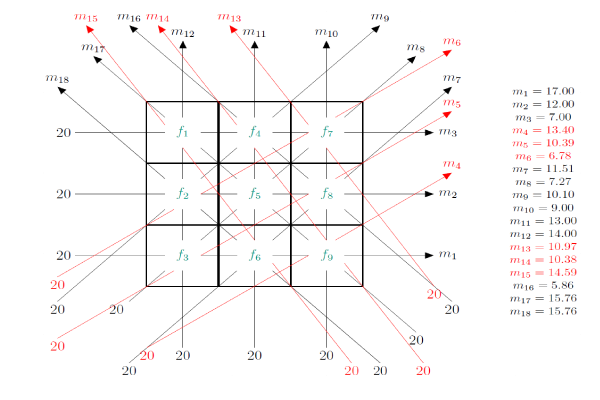

In [33]:
# Eindeutige Lösung
B = [1 0 1 0;
     0 1 0 1;
     1 1 0 0;
     0 0 1 1;
     0 sqrt(2) sqrt(2) 0]; #AB1a
      #sqrt(2) 0 0 sqrt(2)]; #AB1b
 
#m_neu = [5 8 6 7 9];
m_neu = [5 8 6 7 9*sqrt(2)];#AB1a
 #m_neu = [5 8 6 7 6*sqrt(2)];#AB1b

Bild = CT.ueberpruefeEindeutigkeit2x2(f1,f2,f3,f4,B,m_neu);
plot(Bild, showaxis = false)

## Schritt 2 | Komplexere Situation
Da ein Körper aus sehr viel mehr verschiedenen Materialien als vier besteht, erhöhen wir die Anzahl der Zeilen und Spalten und starten nun mit drei Zeilen und Spalten. Zwangsläufig bedeutet dies auch, dass man mehr Strahlen als vorher betrachten muss, jedoch wie viele genau?

**a)** Wie viele Strahlen müsst ihr verwenden, um die Verteilung der Grauwerte eindeutig bestimmen zu können? Stellt hierfür ein Gleichungssystem auf, indem ihr verschiedene Strahlen aus der obigen Abbildung mit den dazugehörigen Messwerten verwendet. ($\bigstar$ Blatt)

Tragt die Matrix $A$ und den Vektor mit den Messwerten $m$, so wie ihr es beim ersten Arbeistblatt gemacht habt, in den folgenden Codeteil ein.

In [34]:
# Matrix-Vektor-Schreibweise zur Bestimmung der Pixeleinträge
A = [1 0 0 1 0 0 1 0 0;
     0 0 0 1 1 1 0 0 0;
     0 0 1 0 0 1 0 0 1;
     1 1 1 0 0 0 0 0 0;
     0 1 0 0 1 0 0 1 0;
     0 0 0 0 0 0 1 1 1;
     0 0 sqrt(2) 0 sqrt(2) 0 sqrt(2) 0 0;
     0 sqrt(2) 0 sqrt(2) 0 0 0 0 0;
     #0 0 0 0 0 sqrt(2) 0 sqrt(2) 0;
     #sqrt(2) 0 0 0 sqrt(2) 0 0 0 sqrt(2);
     0 sqrt(2) 0 0 0 sqrt(2) 0 0 0;
     #0 0 0 sqrt(2) 0 0 0 sqrt(2) 0;
     #0 0 sqrt(13)/3 0 sqrt(13)/6 sqrt(13)/6 0 sqrt(13)/3 0;
     0 0 0 sqrt(13)/3 sqrt(13)/6 0 0 sqrt(13)/6 sqrt(13)/3];
 
m = [13 7 3 6 8 11 20-7.27 20-10.10 20-15.76 20-10.38];#20-11.51 20-15.76  20-5.86  20-10.39 

CT.ueberpruefeMatrixVektora(A,m)

Ihr habt genug Strahlen verwendet. Die Lösung eures Gleichungssystems lautet:
f1 = 2.0
f2 = 2.0
f3 = 2.0
f4 = 5.0
f5 = 1.0
f6 = 1.0
f7 = 6.0
f8 = 4.99
f9 = 0.01

**b)** Was bedeutet dieses Ergebnis in Bezug auf die zu verwendende Anzahl von Strahlen zur Bestimmung der Einträge $f_i$? Was bedeutet dies in Bezug auf die Materialbestimmung bei der Computertomographie? Warum verwenden wir nicht einfach alle Strahlen? ($\bigstar$ Blatt)